In [81]:
import pandas as pd
import numpy as np

Loading Dataset

In [82]:
df = pd.read_csv("D:\DATA SCIENCE PROJECTS\Shopify\Data.csv")

In [83]:
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [84]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The false Mean Amount = 3145.128 

In [85]:
df['order_amount'].mean()

3145.128

### 1.We have to take into account that every order might have more than 1 items hence the average might be wrong due to the fact that eventhough there are 5000 orders the number of items might be more.

Can be done in two ways 

(i) Either get avg amount of every order into a new column and then take avg of the entire avg column(Order amount / total items in the order ) -> Average price of a sneaker.

(ii) Or divide the sum of all orders amounts by sum of all total itens 

I have implemented the first way 

### Create new avg column 

In [86]:
df["Avg_val_per_order"]= df["order_amount"]/ df["total_items"]

In [112]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,Avg_val_per_order
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [111]:
df["Avg_val_per_order"].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: Avg_val_per_order, dtype: float64

The model seems to be Right Skewed as 75 percentile of data goes to 169 dollars but the maximum in the data is 25725 dollars which is very high vaue for a sneaker, eihter the data entered is wrong and is an outlier or it is an actual price of an expensive shoe but pulls the mean to almost 400 as shown below. 

In [89]:
df["Avg_val_per_order"].mean()

387.7428

In [90]:
df["Avg_val_per_order"].median()

153.0

### 2. It is Therefore appropriate to use Median instead of mean as the outliers make the data distribution right skewed and hence pull the mean, not actually depicting the average price of a sneaker.

This is proven by removing outliers and then calculating mean to show how outliers are affecting mean.

In [96]:
advanced_cleaning = df.copy()
advanced_cleaning.drop(columns=['created_at', 'payment_method'], inplace=True)

In [99]:
Avg_values= df.drop(columns= [col for col in df.columns if col !="Avg_val_per_order"] )

<AxesSubplot:>

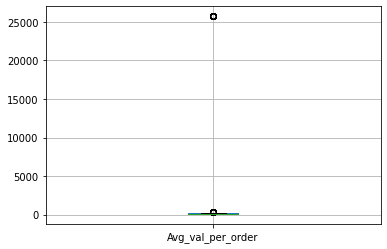

In [100]:
Avg_values.boxplot()

Now we use Z-Scores to eliminate outliers , Z>3 symbolises that the values doesnt lie in the 99% of the distribution or 3 standard deviation from mean and hence is an outlier or exception  

In [101]:
keys=[]
outlier_index=[]

z=abs((advanced_cleaning['Avg_val_per_order']-advanced_cleaning['Avg_val_per_order'].mean())/advanced_cleaning['Avg_val_per_order'].std()) # calculating Z- Score of each coloumn

keys += np.where(z>3)[0].tolist()

# creating index of Outliers 
for k in keys:
    if k not in outlier_index:

        outlier_index.append(k)   
        
outlier_index.sort()

Cleaned_Data = advanced_cleaning.drop(outlier_index) # removing those indexes 



In [113]:
Cleaned_Data.shape

(4954, 6)

It can be seen that a removal of only 46 orders from 5000 gets the mean down to 152.4 which is similar to median , these 46 orders act as outliers and hence finally we use median as the metric to define the Right Skewed distribution.  

In [104]:
Cleaned_Data['Avg_val_per_order'].mean()

152.47557529269278

In [105]:
Cleaned_Data['Avg_val_per_order'].median()

153.0

In [78]:
Avg_values_= Cleaned_Data.drop(columns= [col for col in Cleaned_Data.columns if col !="Avg_val_per_order"] )

<AxesSubplot:>

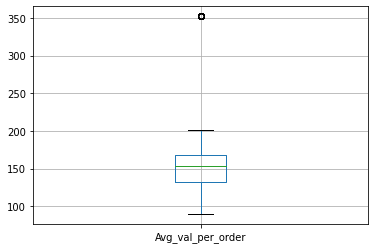

In [79]:
Avg_values_.boxplot()

# 3. Median Value for this Dataset is 153$